In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings

plt.rc('font', family='Malgun Gothic')
plt.rc("axes", unicode_minus = False)

# Read the dataset

## File info
- Game app log 데이터
- 게임 로그 데이터와 유저 정보 데이터

In [2]:
dau = pd.read_csv('data/section4-dau.csv')
dau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170360 entries, 0 to 170359
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   log_date  170360 non-null  object
 1   app_name  170360 non-null  object
 2   user_id   170360 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.9+ MB


In [3]:
user = pd.read_csv('data/section4-user_info.csv')
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49526 entries, 0 to 49525
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   install_date  49526 non-null  object
 1   app_name      49526 non-null  object
 2   user_id       49526 non-null  int64 
 3   gender        49526 non-null  object
 4   generation    49526 non-null  int64 
 5   device_type   49526 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.3+ MB


## Columns info
- dau
    - log_date	
    - app_name	
    - user_id
- user
    - install_date
    - app_name	
    - user_id
    - gender	
    - generation
    - device_type

In [4]:
dau.head()

,log_date,app_name,user_id
0,2013-08-01,game-01,33754
1,2013-08-01,game-01,28598
2,2013-08-01,game-01,30306
3,2013-08-01,game-01,117
4,2013-08-01,game-01,6605


In [5]:
user.head()

,install_date,app_name,user_id,gender,generation,device_type
0,2013-04-15,game-01,1,M,40,iOS
1,2013-04-15,game-01,2,M,10,Android
2,2013-04-15,game-01,3,F,40,iOS
3,2013-04-15,game-01,4,M,10,Android
4,2013-04-15,game-01,5,M,40,iOS


# 데이터 전처리
- 데이터 구조 파악
- 날짜 데이터 타입 변환
- 데이터프레임 합치기
- 데이터 값 변경
- 결측치 처리


## datetime 컬럼의 타입형태 변환하기

In [6]:
dau['log_date'] = pd.to_datetime(dau['log_date'])
dau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170360 entries, 0 to 170359
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   log_date  170360 non-null  datetime64[ns]
 1   app_name  170360 non-null  object        
 2   user_id   170360 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.9+ MB


In [7]:
user['install_date'] = pd.to_datetime(user['install_date'])
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49526 entries, 0 to 49525
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   install_date  49526 non-null  datetime64[ns]
 1   app_name      49526 non-null  object        
 2   user_id       49526 non-null  int64         
 3   gender        49526 non-null  object        
 4   generation    49526 non-null  int64         
 5   device_type   49526 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.3+ MB


## 데이터 프레임 merge

In [8]:
df = pd.merge(dau,user,on='user_id')
df.head()

,log_date,app_name_x,user_id,install_date,app_name_y,gender,generation,device_type
0,2013-08-01,game-01,33754,2013-08-01,game-01,M,20,iOS
1,2013-08-02,game-01,33754,2013-08-01,game-01,M,20,iOS
2,2013-08-01,game-01,28598,2013-07-16,game-01,M,50,iOS
3,2013-08-04,game-01,28598,2013-07-16,game-01,M,50,iOS
4,2013-08-12,game-01,28598,2013-07-16,game-01,M,50,iOS


## 데이터 프레임에 새로운 컬럼(요일) 생성

In [9]:
df['로그요일'] = df['log_date'].apply(lambda x : x.weekday())

## 결측치 확인

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170360 entries, 0 to 170359
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   log_date      170360 non-null  datetime64[ns]
 1   app_name_x    170360 non-null  object        
 2   user_id       170360 non-null  int64         
 3   install_date  170360 non-null  datetime64[ns]
 4   app_name_y    170360 non-null  object        
 5   gender        170360 non-null  object        
 6   generation    170360 non-null  int64         
 7   device_type   170360 non-null  object        
 8   로그요일          170360 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 13.0+ MB


In [11]:
df.isnull().sum()

log_date        0
app_name_x      0
user_id         0
install_date    0
app_name_y      0
gender          0
generation      0
device_type     0
로그요일            0
dtype: int64

## 필요없는 컬럼 삭제

In [12]:
df = df.drop(columns=['app_name_y','app_name_x'])

#  EDA (탐색적 데이터 분석)
- 일별 주요 통계
- 변수별 특성

## 일별 Trend
- 일별 로그 카운트
- 요일별 로그 카운트

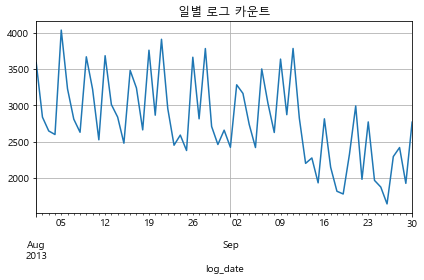

In [13]:
df.groupby('log_date').size().plot()
plt.title("일별 로그 카운트")
plt.grid()
plt.tight_layout()

### note
- 앱 사용에 주기성 존재
- 9월 10일 이후로 로그수가 급감

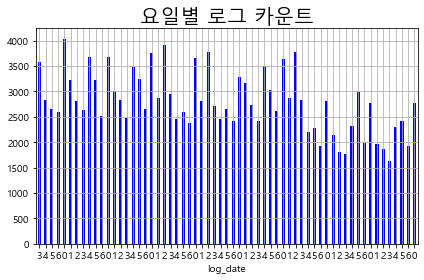

In [14]:
s = df.groupby("log_date").size()
s.index = s.index.dayofweek

s.plot(color='b', kind='bar', rot=0);

plt.title("요일별 로그 카운트",fontsize=20)
plt.grid()
plt.tight_layout()

# 0 : 월요일, 6 : 일요일

### note
- 월요일에 사용량이 매우 급증하고, 주말에 사용량이 낮은편
- 게임앱이라 쉬는 주말에 많이 할 것이라 생각했지만 반대의 결과가 나타남

- 탐색 내용
    - 일별, 성별 로그수
    - 일별, 연령대별 로그수
    - 일별, 운영체제별 로그수

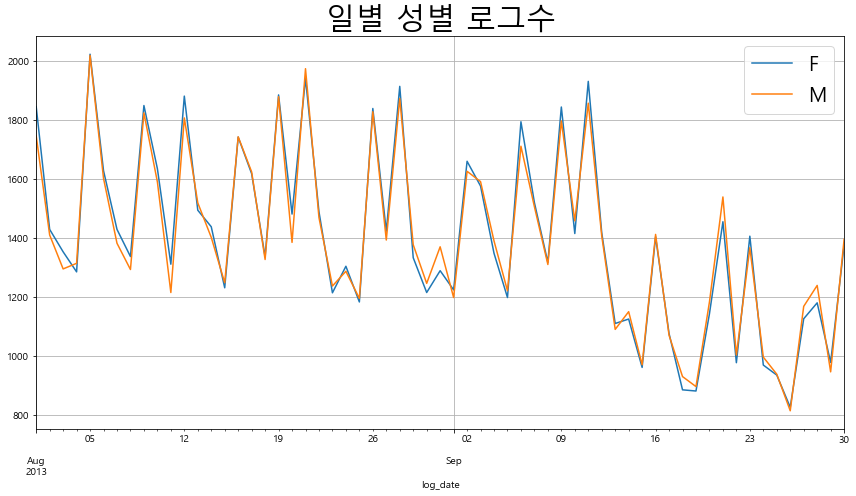

In [15]:
df.groupby(["log_date", "gender"]).size().unstack().plot(figsize=(12,7))
plt.title("일별 성별 로그수",fontsize=30)
plt.legend(fontsize=20)
plt.grid()
plt.tight_layout()

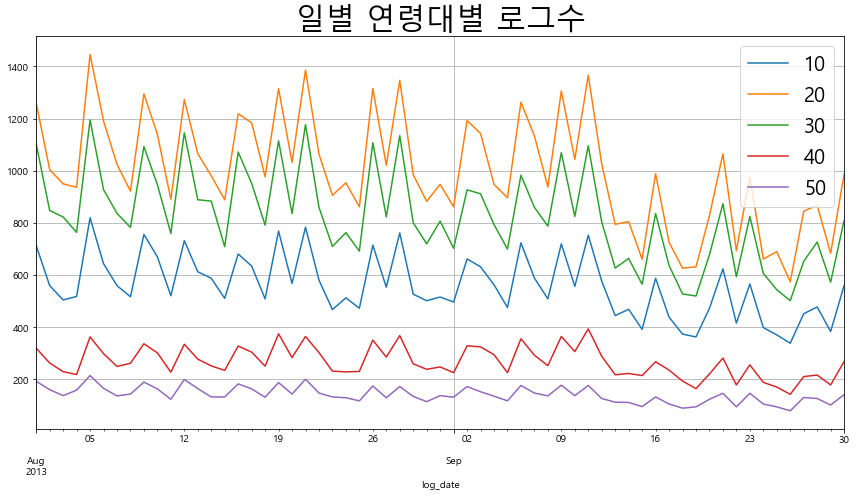

In [16]:
df.groupby(["log_date", "generation"]).size().unstack().plot(figsize=(12,7))
plt.title("일별 연령대별 로그수",fontsize=30)
plt.legend(fontsize=20)
plt.grid()
plt.tight_layout()

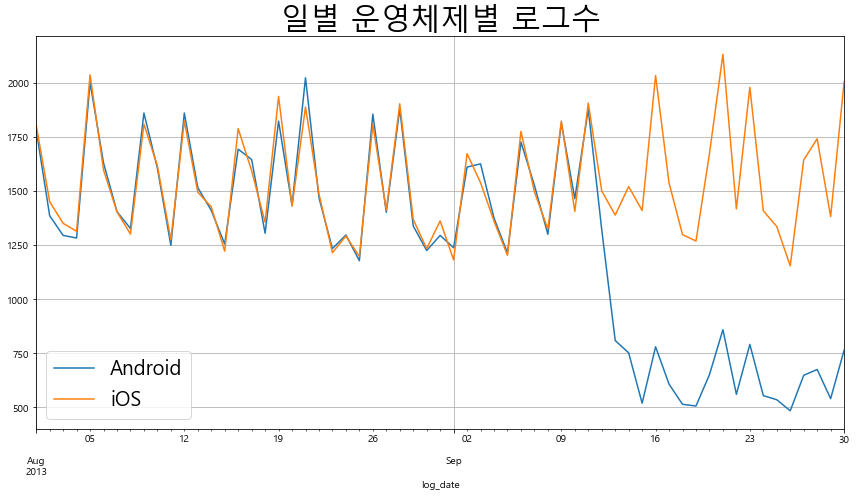

In [17]:
df.groupby(["log_date", "device_type"]).size().unstack().plot(figsize=(12,7))
plt.title("일별 운영체제별 로그수",fontsize=30)
plt.legend(fontsize=20)
plt.grid()
plt.tight_layout()

### note
- 남,녀 차이는 크게 업음
- 20대 -> 30대 -> 10대 -> 40대 -> 50대 순으로 주로 사용
- 9월 10일을 기준으로 Android 이용자가 대거 빠짐

## 리텐션(Retention) 분석
- 코호트에 따른 차이 살펴보기
- 날짜(주별) 기준

In [18]:
#로그일자 데이터 -> 주차로 변경하기

df['log_weeks']=df['log_date'].apply(lambda x : datetime.strftime(x,'%Y-%V'))

In [19]:
df_retention = df.set_index('user_id')
df_retention.head()

,log_date,install_date,gender,generation,device_type,로그요일,log_weeks
user_id,,,,,,,
33754,2013-08-01,2013-08-01,M,20,iOS,3,2013-31
33754,2013-08-02,2013-08-01,M,20,iOS,4,2013-31
28598,2013-08-01,2013-07-16,M,50,iOS,3,2013-31
28598,2013-08-04,2013-07-16,M,50,iOS,6,2013-31
28598,2013-08-12,2013-07-16,M,50,iOS,0,2013-33


In [20]:
Firstlog=df_retention.groupby(df_retention.index)['log_date'].min()
Firstlog.head()

user_id
1   2013-09-01
2   2013-08-07
3   2013-08-01
4   2013-08-09
6   2013-08-07
Name: log_date, dtype: datetime64[ns]

In [21]:
Firstlog=Firstlog.apply(lambda x : datetime.strftime(x,'%Y-%V'))
Firstlog.head()

user_id
1    2013-35
2    2013-32
3    2013-31
4    2013-32
6    2013-32
Name: log_date, dtype: object

In [22]:
df_retention['log_first'] = Firstlog

In [23]:
df_retention.reset_index(inplace=True)
df_retention.head()

,user_id,log_date,install_date,gender,generation,device_type,로그요일,log_weeks,log_first
0,33754,2013-08-01,2013-08-01,M,20,iOS,3,2013-31,2013-31
1,33754,2013-08-02,2013-08-01,M,20,iOS,4,2013-31,2013-31
2,28598,2013-08-01,2013-07-16,M,50,iOS,3,2013-31,2013-31
3,28598,2013-08-04,2013-07-16,M,50,iOS,6,2013-31,2013-31
4,28598,2013-08-12,2013-07-16,M,50,iOS,0,2013-33,2013-31


In [24]:
grouped = df_retention.groupby(['log_first','log_weeks'])

In [25]:
cohorts = grouped['user_id'].nunique()
cohorts.head()

log_first  log_weeks
2013-31    2013-31      6053
           2013-32      3749
           2013-33      3228
           2013-34      2932
           2013-35      2662
Name: user_id, dtype: int64

In [26]:
cohorts = cohorts.reset_index()
cohorts.head()

,log_first,log_weeks,user_id
0,2013-31,2013-31,6053
1,2013-31,2013-32,3749
2,2013-31,2013-33,3228
3,2013-31,2013-34,2932
4,2013-31,2013-35,2662


In [27]:
cohorts.rename({'user_id':'totalusers'},axis=1,inplace=True)
cohorts.head()

,log_first,log_weeks,totalusers
0,2013-31,2013-31,6053
1,2013-31,2013-32,3749
2,2013-31,2013-33,3228
3,2013-31,2013-34,2932
4,2013-31,2013-35,2662


In [28]:
each_period=cohorts['log_first'].value_counts().sort_index()
each_period

2013-31    10
2013-32     9
2013-33     8
2013-34     7
2013-35     6
2013-36     5
2013-37     4
2013-38     3
2013-39     2
2013-40     1
Name: log_first, dtype: int64

In [29]:
cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

In [30]:
cohorts['CohortPeriod']=cohortperiod
cohorts.head(20)

,log_first,log_weeks,totalusers,CohortPeriod
0,2013-31,2013-31,6053,0
1,2013-31,2013-32,3749,1
2,2013-31,2013-33,3228,2
3,2013-31,2013-34,2932,3
4,2013-31,2013-35,2662,4
5,2013-31,2013-36,2415,5
6,2013-31,2013-37,2323,6
7,2013-31,2013-38,1957,7
8,2013-31,2013-39,1724,8
9,2013-31,2013-40,798,9


In [31]:
cohorts.set_index(['log_first','CohortPeriod'],inplace=True)
cohorts.head()

log_weeks  totalusers
log_first CohortPeriod                      
2013-31   0              2013-31        6053
          1              2013-32        3749
          2              2013-33        3228
          3              2013-34        2932
          4              2013-35        2662

In [32]:
cohorts=cohorts['totalusers'].unstack(1)
cohorts

CohortPeriod,0,1,2,3,4,5,6,7,8,9
log_first,,,,,,,,,,
2013-31,6053.0,3749.0,3228.0,2932.0,2662.0,2415.0,2323.0,1957.0,1724.0,798.0
2013-32,4816.0,2434.0,2057.0,1761.0,1550.0,1396.0,1134.0,976.0,365.0,NaN
2013-33,2887.0,1013.0,745.0,612.0,533.0,437.0,348.0,135.0,NaN,NaN
2013-34,1972.0,684.0,481.0,408.0,342.0,290.0,100.0,NaN,NaN,NaN
2013-35,2034.0,742.0,498.0,385.0,307.0,117.0,NaN,NaN,NaN,NaN
2013-36,2114.0,802.0,493.0,390.0,120.0,NaN,NaN,NaN,NaN,NaN
2013-37,1886.0,664.0,424.0,143.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-38,1595.0,559.0,160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-39,1783.0,382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
user_retention=cohorts.divide(cohorts[0],axis=0)
user_retention

CohortPeriod,0,1,2,3,4,5,6,7,8,9
log_first,,,,,,,,,,
2013-31,1.0,0.619362,0.533289,0.484388,0.439782,0.398976,0.383777,0.323311,0.284817,0.131835
2013-32,1.0,0.505399,0.427118,0.365656,0.321844,0.289867,0.235465,0.202658,0.075789,NaN
2013-33,1.0,0.350883,0.258053,0.211985,0.184621,0.151368,0.120540,0.046761,NaN,NaN
2013-34,1.0,0.346856,0.243915,0.206897,0.173428,0.147059,0.050710,NaN,NaN,NaN
2013-35,1.0,0.364798,0.244838,0.189282,0.150934,0.057522,NaN,NaN,NaN,NaN
2013-36,1.0,0.379376,0.233207,0.184484,0.056764,NaN,NaN,NaN,NaN,NaN
2013-37,1.0,0.352068,0.224814,0.075822,NaN,NaN,NaN,NaN,NaN,NaN
2013-38,1.0,0.350470,0.100313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-39,1.0,0.214246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


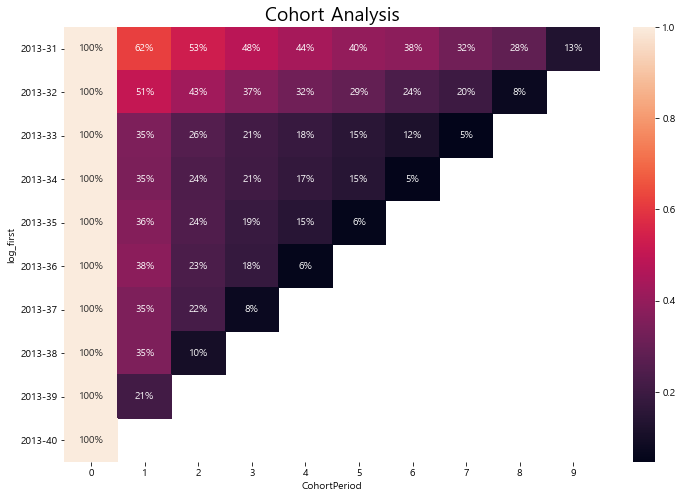

In [34]:
plt.figure(figsize=(12, 8))
plt.title('Cohort Analysis', fontsize=19)
sns.heatmap(user_retention, annot=True, fmt='.0%')
plt.yticks(rotation = 0)
plt.show()

In [35]:
cohorts[0]

log_first
2013-31    6053.0
2013-32    4816.0
2013-33    2887.0
2013-34    1972.0
2013-35    2034.0
2013-36    2114.0
2013-37    1886.0
2013-38    1595.0
2013-39    1783.0
2013-40     448.0
Name: 0, dtype: float64

### note
- 첫번째 코호트 (13년 31주차)가 리텐션 비율이 상대적으로 높다.
    - 62%가 일주일후에도 활동중이였고 시간이 가면서 점점 감소하는 추세다
- 계속해서 새로 유입되는 사용자가 급속도로 줄고 있다.
- 13년 31,32,주차 코호트를 제외하고는 첫주차에 60%이상이 이탈한다.

# 집단별 retention 차이 분석

In [38]:
def retention(df):
    df_retention = df.set_index('user_id')
    Firstlog=df_retention.groupby(df_retention.index)['log_date'].min()
    Firstlog=Firstlog.apply(lambda x : datetime.strftime(x,'%Y-%V'))
    df_retention['log_first'] = Firstlog
    df_retention.reset_index(inplace=True)
    grouped = df_retention.groupby(['log_first','log_weeks'])
    cohorts = grouped['user_id'].nunique()
    cohorts = cohorts.reset_index()
    cohorts.rename({'user_id':'totalusers'},axis=1,inplace=True)
    each_period=cohorts['log_first'].value_counts().sort_index()
    cohortperiod=[]

    for x in each_period: 
        for y in range(x):
            cohortperiod.append(y)
    cohorts['CohortPeriod']=cohortperiod
    cohorts.set_index(['log_first','CohortPeriod'],inplace=True)
    cohorts=cohorts['totalusers'].unstack(1)
    user_retention=cohorts.divide(cohorts[0],axis=0)
    
    return cohorts, user_retention

In [55]:
def retention_chart(df):
    plt.figure(figsize=(12, 8))
    plt.title('Cohort Analysis', fontsize=19)
    sns.heatmap(df, annot=True, fmt='.0%')
    plt.yticks(rotation = 0)
    plt.show()

In [44]:
cohorts_M , user_retention_M = retention(df[df.gender == 'M'])
cohorts_F , user_retention_F = retention(df[df.gender == 'F'])
cohorts_10 , user_retention_10 = retention(df[df.generation == 10]) 
cohorts_20 , user_retention_20 = retention(df[df.generation == 20]) 
cohorts_30 , user_retention_30 = retention(df[df.generation == 30]) 
cohorts_40 , user_retention_40 = retention(df[df.generation == 40]) 
cohorts_50 , user_retention_50 = retention(df[df.generation == 50]) 
cohorts_ios , user_retention_ios = retention(df[df.device_type == 'iOS'])
cohorts_android , user_retention_android = retention(df[df.device_type == 'Android'])

## 성 별 retention 차이

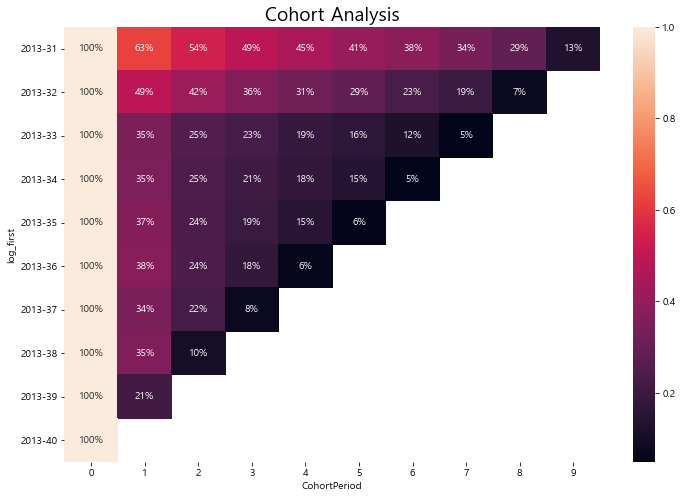

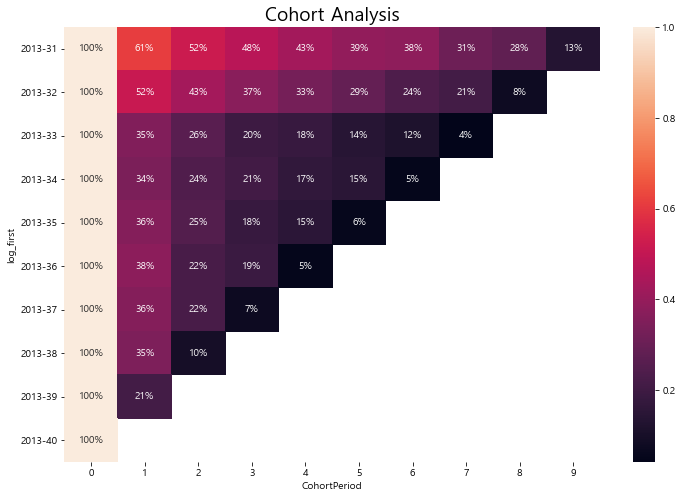

In [56]:
retention_chart(user_retention_M)
retention_chart(user_retention_F)

### note
 - sex에 따른 retention 차이는 크게 없음

## 연령별 retention 차이

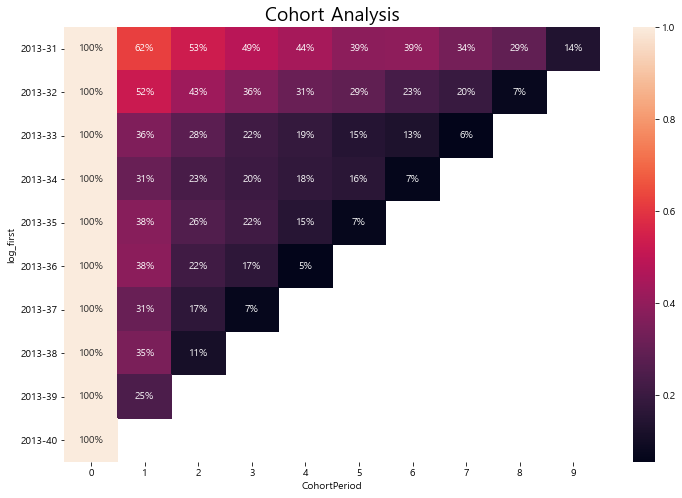

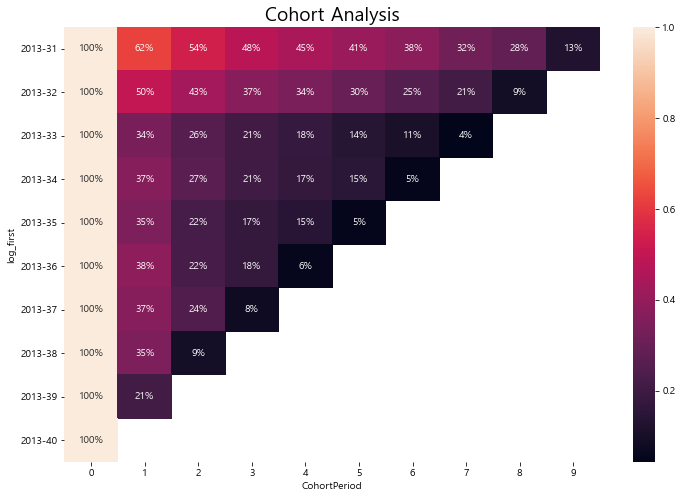

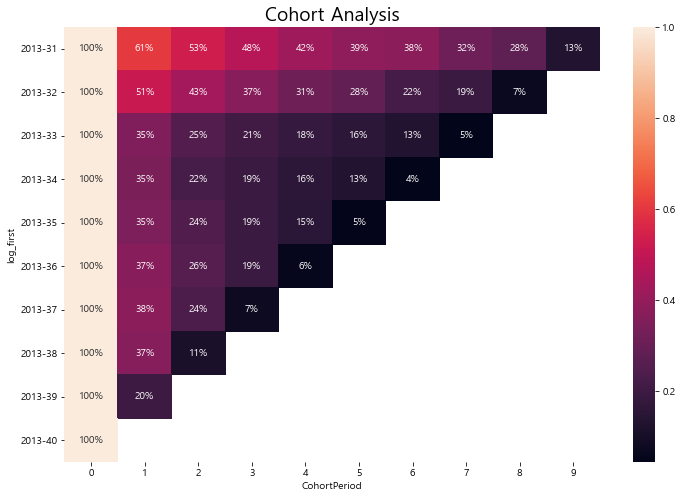

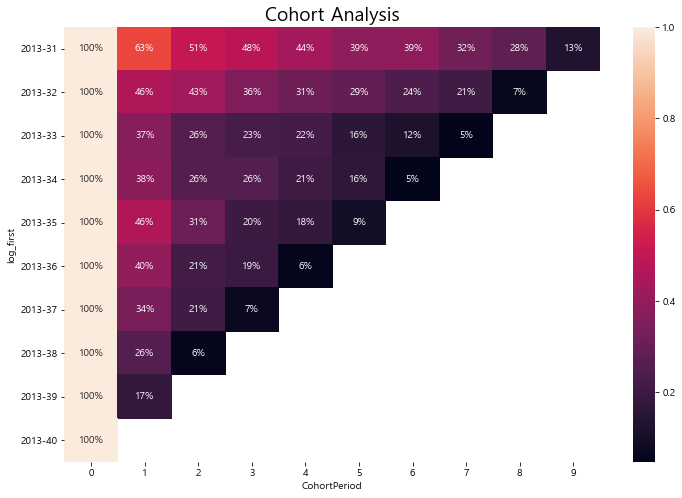

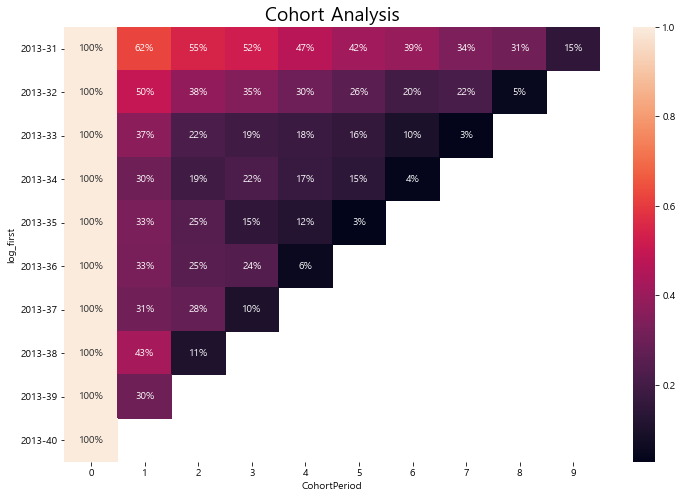

In [57]:
retention_chart(user_retention_10)
retention_chart(user_retention_20)
retention_chart(user_retention_30)
retention_chart(user_retention_40)
retention_chart(user_retention_50)

### note
- 40,50대가 전체적인 volume은 작지만, 첫주차까지의 리텐션 비율이 상대적으로 높음

## 운영체제별 retention

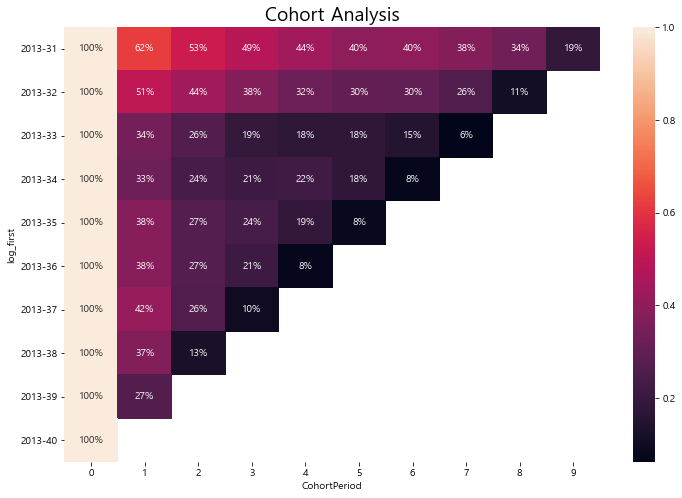

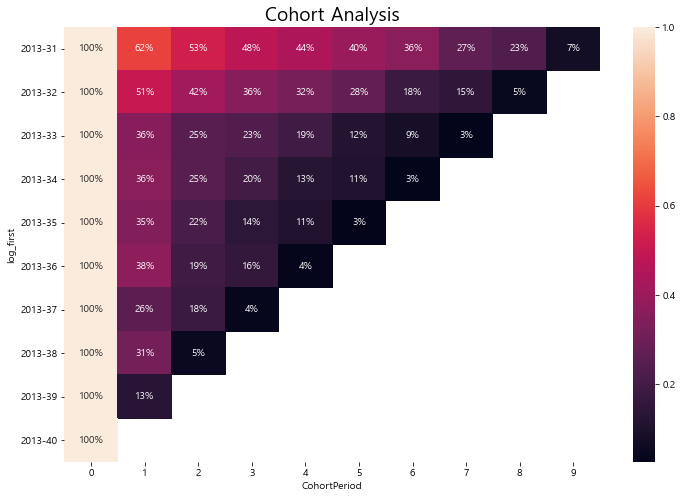

In [58]:
retention_chart(user_retention_ios)
retention_chart(user_retention_android)

### note
- android 유저의 이탈률이 ios에 비해 높음

# 결론

## 현황
- 주말 대비 주중 특정 요일(월요일,수요일)에 사용량이 높음
- 20대, 30대가 주요 고객
- 9월 10일 이후로 android 사용자가 급감함
- 시간이 지날수록 유입되는 사용자가 줄고 있고, 리텐션이 안정화 되지 못하고 계속해서 감소함

## 시사점
- Andriod 관련 앱 검토 필요
- 접속자가 꾸준히 감소하는 추세. 원인 파악 필요
- 초기 리텐션이 떨어지는 속도를 늦춰야 함